In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data=data.drop(['RowNumber','CustomerId','Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from sklearn.preprocessing import OneHotEncoder
onehot_encode=OneHotEncoder()
encoded_geo=onehot_encode.fit_transform(data[['Geography']]).toarray()
encoded_geo

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [5]:
onehot_encode.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encode_gender=LabelEncoder()
data['Gender']=label_encode_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
whole_encoded_geo=pd.DataFrame(encoded_geo, columns=onehot_encode.get_feature_names_out(['Geography']))
whole_encoded_geo.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [8]:
data=pd.concat([data.drop('Geography', axis=1), whole_encoded_geo],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [9]:
X= data.drop('Exited', axis=1)
Y= data['Exited']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(8000, 12)

In [12]:
X_test.shape

(2000, 12)

In [13]:
Y_train.shape

(8000,)

In [14]:
Y_test.shape

(2000,)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [16]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    
    Dense(1, activation="sigmoid")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

early_stop_callback=EarlyStopping(monitor='val_loss', patience=10 , restore_best_weights=True)

In [20]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, callbacks=[early_stop_callback])

Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 0.4741 - accuracy: 0.7890 - val_loss: 0.4117 - val_accuracy: 0.8215
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8261 - val_loss: 0.3888 - val_accuracy: 0.8355
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8393 - val_loss: 0.3703 - val_accuracy: 0.8455
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8475 - val_loss: 0.3570 - val_accuracy: 0.8540
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8528 - val_loss: 0.3532 - val_accuracy: 0.8540
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8556 - val_loss: 0.3488 - val_accuracy: 0.8575
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8579 - val_loss: 0.3500 - val_accuracy: 0.85

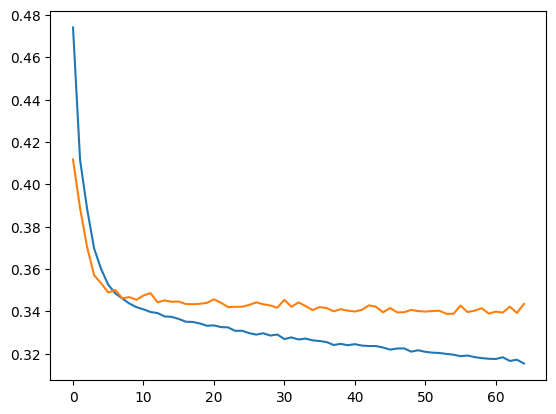

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


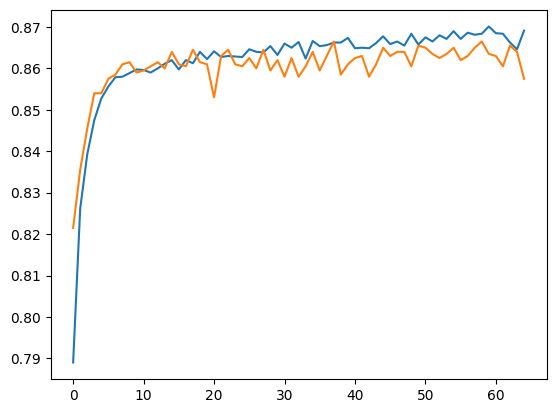

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [23]:
import pickle
with open("Scaler_pkl.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [24]:
model.save('Model_h5.h5')

d:\GenAI\ANN_Implementation\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
yp=model.predict(X_test)
Y_pred=[]
for i in yp:
    if i>0.5:
        Y_pred.append(1)
        print("Yes! The Customer is likely to churn.")
    else:
        Y_pred.append(0)
        print("No!")


63/63 [==============================] - 0s 2ms/step
No!
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
No!
No!
No!
No!
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
No!
No!
No!
Yes! The Customer is likely to churn.
No!
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
No!
Yes! The Customer is likely to churn.
Yes! The Customer is likely to churn.
No!
No!
No!
No!
No!
No!
No!
Y

In [78]:
Y_test[:20]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
2750    1
7487    1
5272    1
5653    0
3999    0
6033    0
582     0
9930    0
7051    0
8158    0
Name: Exited, dtype: int64

In [79]:
Y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000

